In [1]:
import time
import subprocess as sp
import os
import json

In [2]:
sizes = ["256x144", "426x240", "640x360", "854x480", "1280x720", "1920x1080"]

In [3]:
def run_video_to_matte(input_video, size, frames):
    python_program = "./video_to_matte.py"
    command = ["python",  python_program,
                '-m', "real-hand-held", 
                '-i', input_video,
                '-b', "pruebas/back_image.png",
                '-f', str(frames),
                '-s', size,
                '-w', "pruebas",
                '-r', "pruebas/results"]
    print("Starting run \nFile: {}\nSize: {}\nFrames: {}".format(input_video, str(size), str(frames)))
    sp.run(command)
    print("Finished run successfully")

In [4]:
input_video = "/home/josmar/proyectos/codes/01_annotation_tools/background_substraction/input_video/trimmed_900.mp4"
frames = 600
time_dict = {}
for size in sizes:

    start = time.time()
    run_video_to_matte(input_video, size, frames)
    end = time.time()
    
    time_dict [size] = round(end-start, 2)

Starting run 
File: /home/josmar/proyectos/codes/01_annotation_tools/background_substraction/input_video/trimmed_900.mp4
Size: 256x144
Frames: 600
Finished run successfully
Starting run 
File: /home/josmar/proyectos/codes/01_annotation_tools/background_substraction/input_video/trimmed_900.mp4
Size: 426x240
Frames: 600
Finished run successfully
Starting run 
File: /home/josmar/proyectos/codes/01_annotation_tools/background_substraction/input_video/trimmed_900.mp4
Size: 640x360
Frames: 600
Finished run successfully
Starting run 
File: /home/josmar/proyectos/codes/01_annotation_tools/background_substraction/input_video/trimmed_900.mp4
Size: 854x480
Frames: 600
Finished run successfully
Starting run 
File: /home/josmar/proyectos/codes/01_annotation_tools/background_substraction/input_video/trimmed_900.mp4
Size: 1280x720
Frames: 600
Finished run successfully
Starting run 
File: /home/josmar/proyectos/codes/01_annotation_tools/background_substraction/input_video/trimmed_900.mp4
Size: 1920x10

In [5]:
with open('times.json', 'w') as json_file:
    json.dump(time_dict, json_file)

In [ ]:
## Reading and plotting times

In [4]:
import json
import matplotlib.pyplot as plt

with open('times.json') as f:
    data = json.load(f)

In [31]:
x = data.keys()
y = [600/data[key] for key in data.keys()]

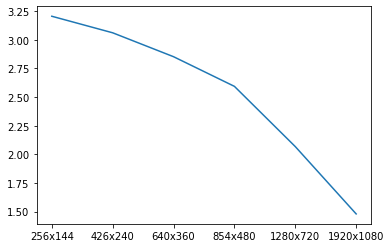

In [8]:
plt.plot(x,y)

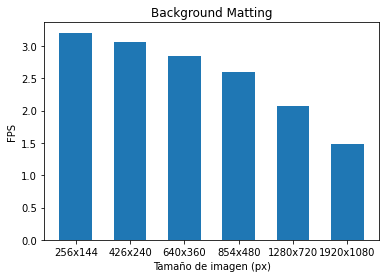

In [33]:
plt.rc("font", size=10)
y_pos = list(range(0, 12, 2))

plt.bar(y_pos,y, width=1.2)
plt.title(label='Background Matting')
plt.xticks(y_pos, x)
plt.xlabel("Tamaño de imagen (px)")
plt.ylabel("FPS")
plt.savefig("Background_matting_FPS.svg")
plt.show()

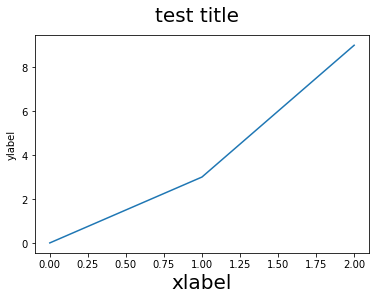

In [28]:
# set up a plot with dummy data
fig, ax = plt.subplots()
x = [0, 1, 2]
y = [0, 3, 9]
ax.plot(x,y)

# title and labels, setting initial sizes
fig.suptitle('test title', fontsize= 20)
ax.set_xlabel('FPS', fontsize=16)
ax.set_ylabel('ylabel', fontsize=16)   # relative to plt.rcParams['font.size']

# setting label sizes after creation
ax.xaxis.label.set_size(20)
plt.draw()